In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from scipy import stats
sys.path.append(os.path.abspath('../scripts'))

In [2]:
from Overview_Analysis import load_data_using_sqlalchemy, calculate_missing_percentage, drop_columns_with_missing_values, impute_numerical_columns, plot_top_10_handsets, plot_top_3_manufacturers, top_5_handsets_per_manufacturer, detect_and_remove_outliers, calculate_summary_statistics, plot_variable_distributions, plot_application_usage, analyze_application_correlations, analyze_correlation_matrix, perform_pca

In [3]:
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
    
df.sample(7)

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
56921,1.304243e+19,4/26/2019 7:40,676.0,4/27/2019 7:40,590.0,86399.0,2.082014e+14,3.369913e+10,8.637690e+13,D79356C,...,12889099.0,10611946.0,14308107.0,6336049.0,188803778.0,16494990.0,103737575.0,78587.0,35877478.0,225397657.0
109487,7.277826e+18,4/28/2019 3:06,90.0,4/29/2019 2:55,442.0,85745.0,2.082003e+14,3.366023e+10,3.538421e+13,D30667B,...,15090067.0,20841322.0,10783012.0,20983955.0,801325439.0,2106888.0,131948463.0,4403282.0,50436134.0,840093584.0
105677,7.277826e+18,4/28/2019 1:04,456.0,4/29/2019 1:04,437.0,86399.0,2.082010e+14,3.361222e+10,3.561461e+13,D15839B,...,13014750.0,8992155.0,4871241.0,6432301.0,714666480.0,10993388.0,204627450.0,1715498.0,31792667.0,737722416.0
35932,1.311448e+19,4/25/2019 7:03,892.0,4/26/2019 9:27,688.0,95029.0,2.082017e+14,3.364666e+10,3.554181e+13,L88983B,...,8650420.0,5806102.0,1851517.0,13747704.0,443905345.0,8844638.0,783160813.0,14496140.0,46823081.0,463591723.0
93419,1.311448e+19,4/27/2019 5:39,244.0,4/29/2019 2:15,141.0,160546.0,2.082019e+14,3.366298e+10,3.540531e+13,T77637B,...,20129803.0,20737385.0,17771395.0,2002186.0,681674816.0,5153597.0,702757017.0,11913403.0,41247383.0,722899316.0
85778,7.277826e+18,4/27/2019 16:28,885.0,4/28/2019 2:21,891.0,35575.0,2.082009e+14,3.363548e+10,3.532711e+13,T76086A,...,20827137.0,21892764.0,16528068.0,8728005.0,254186636.0,10873064.0,60651384.0,10533322.0,53460112.0,301659878.0
137458,1.311448e+19,4/29/2019 6:56,504.0,4/30/2019 10:52,812.0,100548.0,2.082010e+14,3.378223e+10,3.530881e+13,D74571C,...,3510773.0,4510095.0,16260955.0,15676100.0,682580093.0,791634.0,723134430.0,12690817.0,37277688.0,713698718.0


In [4]:
calculate_missing_percentage(df)

,Missing Values,Percentage
Bearer Id,991,0.660662
Start,1,0.000667
Start ms,1,0.000667
End,1,0.000667
End ms,1,0.000667
Dur. (ms),1,0.000667
IMSI,570,0.379997
MSISDN/Number,1066,0.710662
IMEI,572,0.381331
Last Location Name,1153,0.768662


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df = drop_columns_with_missing_values(df)

Columns dropped: 10


In [7]:
df = impute_numerical_columns(df)
df = df.dropna()

Imputed missing values in the following columns: ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [8]:
df.sample(7)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
120304,1.311448e+19,4/28/2019 11:28,765.0,4/30/2019 19:26,838.0,201472.0,2.082003e+14,3.366916e+10,3.528141e+13,L42048A,...,9168681.0,3997974.0,17830786.0,9791863.0,539217992.0,15180876.0,13424262.0,3438763.0,35156927.0,582449299.0
140064,1.311448e+19,4/22/2019 8:15,473.0,4/25/2019 2:55,731.0,239954.0,2.082010e+14,3.366875e+10,3.533251e+13,L76864A,...,14851113.0,1312259.0,11225027.0,15097330.0,522050751.0,1138947.0,281699270.0,3082007.0,21749419.0,549470626.0
44197,1.311448e+19,4/25/2019 10:43,682.0,4/27/2019 11:06,677.0,174147.0,2.082019e+14,3.365806e+10,3.543761e+13,D77706C,...,4905700.0,6278583.0,413272.0,3806508.0,496407826.0,12534778.0,183824466.0,3405353.0,28084286.0,507180037.0
142319,1.304243e+19,4/24/2019 2:33,854.0,4/25/2019 2:33,809.0,86399.0,2.082017e+14,3.365996e+10,8.637690e+13,D93868B,...,19862861.0,7245491.0,19607688.0,20197851.0,241048834.0,5109455.0,311085867.0,11651397.0,47093318.0,294239944.0
11084,1.304243e+19,4/24/2019 20:17,296.0,4/25/2019 0:31,609.0,15211.0,2.082015e+14,3.360910e+10,3.575461e+13,D42179A,...,15487189.0,2548873.0,12994827.0,21161900.0,673541534.0,12472968.0,819402896.0,903187.0,39993632.0,710116331.0
2796,1.304243e+19,4/24/2019 18:05,11.0,4/25/2019 0:02,671.0,21441.0,2.082003e+14,3.367118e+10,3.564571e+13,L77632B,...,504025.0,10333151.0,7055400.0,16542588.0,412113902.0,4949186.0,586180114.0,13317556.0,49125260.0,428674356.0
99445,1.311448e+19,4/27/2019 17:25,175.0,4/29/2019 0:04,351.0,110354.0,2.082021e+14,3.367276e+10,3.520751e+13,D16418C,...,14494199.0,5930612.0,8437911.0,21898274.0,325528792.0,6400692.0,288339647.0,7454233.0,42528673.0,361290868.0


In [9]:
# Group by 'Handset Type' and count occurrences
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19724
Apple iPhone 6S (A1688)          9391
Apple iPhone 6 (A1586)           8991
undefined                        8892
Apple iPhone 7 (A1778)           6274
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4555
Samsung Galaxy S8 (Sm-G950F)     4459
Apple iPhone X (A1901)           3805
Name: count, dtype: int64


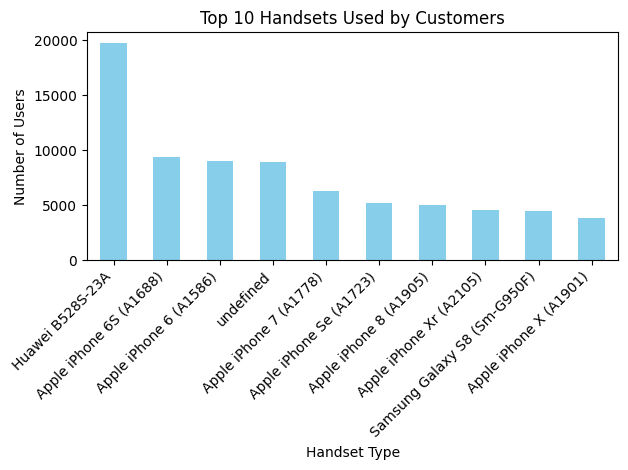

In [10]:
plot_top_10_handsets(top_10_handsets)

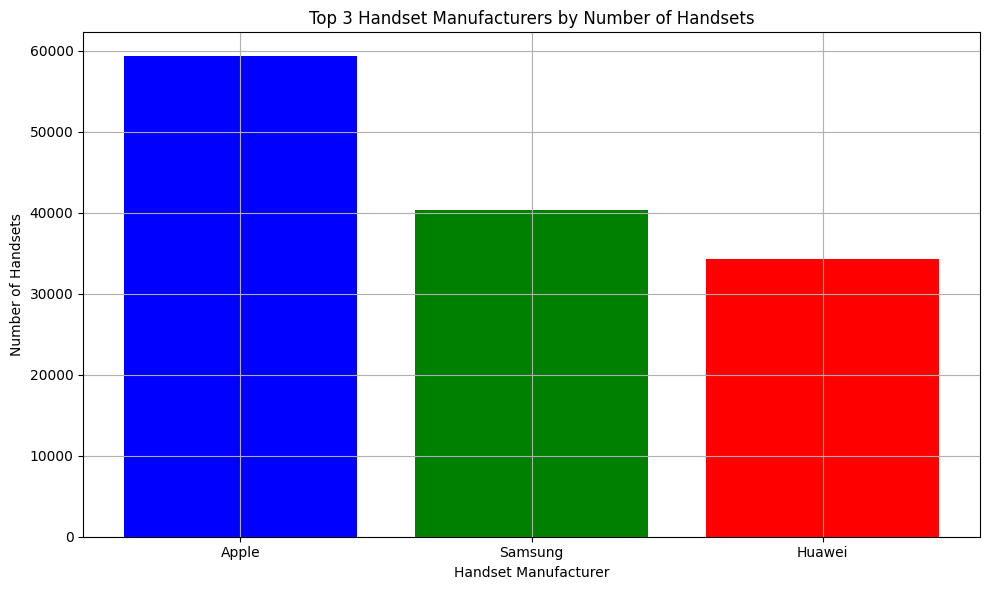

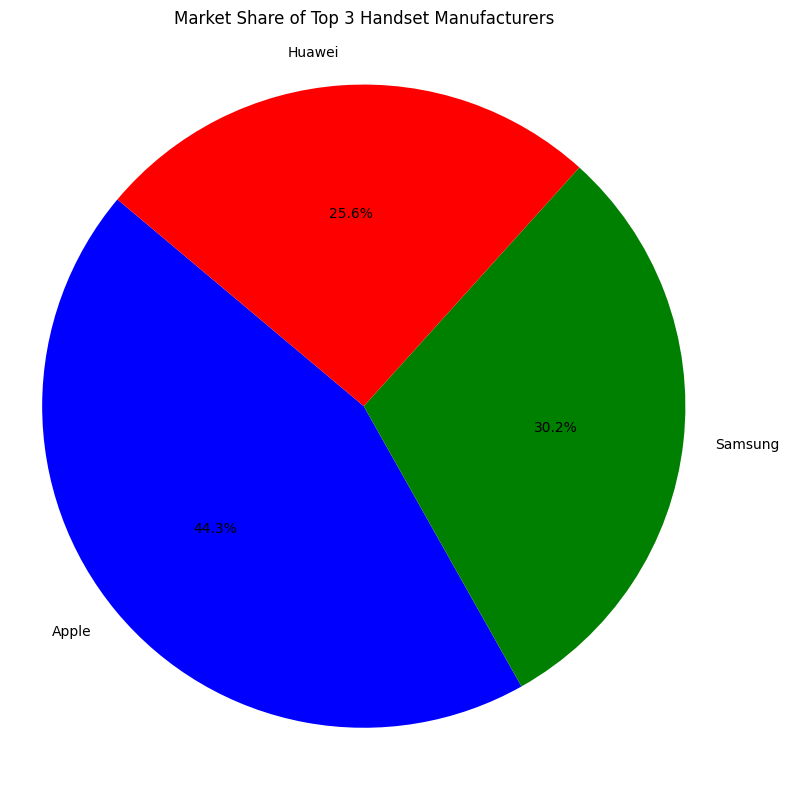

In [11]:
plot_top_3_manufacturers(df)

In [12]:
top_5_handsets_per_manufacturer(df)

,Handset Manufacturer,Handset Type,Count
60,Apple,Apple iPhone 6S (A1688),9391
56,Apple,Apple iPhone 6 (A1586),8991
66,Apple,Apple iPhone 7 (A1778),6274
80,Apple,Apple iPhone Se (A1723),5165
73,Apple,Apple iPhone 8 (A1905),4977
314,Huawei,Huawei B528S-23A,19724
335,Huawei,Huawei E5180,2073
412,Huawei,Huawei P20 Lite Huawei Nova 3E,2011
411,Huawei,Huawei P20,1475
452,Huawei,Huawei Y6 2018,987


In [13]:
xdr_sessions_per_user = df.groupby('IMSI').size().reset_index(name='Number_of_xDR_Sessions')
print(xdr_sessions_per_user.sample(7))

                IMSI  Number_of_xDR_Sessions
1809    2.082003e+14                       1
101986  2.082022e+14                       1
10540   2.082009e+14                       1
97441   2.082019e+14                       2
40669   2.082014e+14                       1
15303   2.082010e+14                       1
72863   2.082017e+14                       1


In [14]:
total_session_duration_per_user = df.groupby('IMSI')['Dur. (ms)'].sum().reset_index(name='Total_Session_Duration_ms')
print(total_session_duration_per_user.head())

           IMSI  Total_Session_Duration_ms
0  2.040471e+14                   869844.0
1  2.040808e+14                   877385.0
2  2.082001e+14                    86019.0
3  2.082001e+14                    86254.0
4  2.082001e+14                   573923.0


In [15]:
total_data_per_user = df.groupby('IMSI')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()
total_data_per_user.columns = ['IMSI', 'Total_DL_Bytes', 'Total_UL_Bytes']
print(total_data_per_user.head())

           IMSI  Total_DL_Bytes  Total_UL_Bytes
0  2.040471e+14      78697597.0      60456049.0
1  2.040808e+14     194828056.0      37295915.0
2  2.082001e+14      31376981.0      53794658.0
3  2.082001e+14     392918313.0      33583272.0
4  2.082001e+14     961767023.0      71325004.0


In [16]:
# List of application data volume columns (Download and Upload)
app_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]
# Group by the user identifier (e.g., 'IMSI') and sum the data volume for each application
total_app_data_per_user = df.groupby('IMSI')[app_columns].sum().reset_index()
# Rename the columns for better clarity (optional)
total_app_data_per_user.columns = ['IMSI'] + [f'Total_{col.replace(" (Bytes)", "")}' for col in app_columns]
# Display the result
print(total_app_data_per_user.head())

           IMSI  Total_Social Media DL  Total_Social Media UL  \
0  2.040471e+14              1500145.0                45943.0   
1  2.040808e+14               668596.0                46628.0   
2  2.082001e+14              3073697.0                49084.0   
3  2.082001e+14              2542767.0                34337.0   
4  2.082001e+14              3326811.0                99905.0   

   Total_Youtube DL  Total_Youtube UL  Total_Netflix DL  Total_Netflix UL  \
0        18980320.0        21960390.0        21621336.0         7224894.0   
1         9839889.0         2120016.0        10340908.0        16251392.0   
2         5556563.0        14325876.0        15305361.0        16525201.0   
3        22414714.0         3242918.0        10065639.0        17720213.0   
4         4046597.0         9793604.0        30748449.0        26594966.0   

   Total_Google DL  Total_Google UL  Total_Email DL  Total_Email UL  \
0        5985089.0        3233558.0       2518425.0        812549.0   
1   

In [17]:
# List of numeric columns
numeric_columns = ['Dur. (ms).1', 'Activity Duration UL (ms)', 'Activity Duration DL (ms)',
    'UL TP > 300 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
    '10 Kbps < UL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)',
    'DL TP > 1 Mbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
    '50 Kbps < DL TP < 250 Kbps (%)', 'DL TP < 50 Kbps (%)',
    'Avg Bearer TP UL (kbps)', 'Avg Bearer TP UL (kbps)',
    'Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'Dur. (ms)',
    'End ms', 'End', 'Start ms', 'Start', 'Social Media DL (Bytes)', 
    'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 
    'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 
    'Other UL (Bytes)']
# Convert each column to numeric, applying errors='coerce' to handle non-numeric values
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Apply Z-score
z_scores = stats.zscore(df[numeric_columns], nan_policy='omit')
# Define a threshold (e.g., 3 standard deviations away)
threshold = 3
outliers = (abs(z_scores) > threshold)
# View outliers (True = Outlier)
df_outliers = df[outliers.any(axis=1)]
print(df_outliers)

           Bearer Id  Start  Start ms  End  End ms  Dur. (ms)          IMSI  \
6       1.304243e+19    NaN     616.0  NaN    26.0    22957.0  2.082015e+14   
11      1.304243e+19    NaN     627.0  NaN   744.0    27048.0  2.082009e+14   
14      1.304243e+19    NaN     554.0  NaN   995.0    27008.0  2.082010e+14   
16      7.277826e+18    NaN     433.0  NaN   436.0    27155.0  2.082015e+14   
40      7.277826e+18    NaN      25.0  NaN   402.0    29397.0  2.082015e+14   
...              ...    ...       ...  ...     ...        ...           ...   
149941  7.277826e+18    NaN      56.0  NaN   227.0    28050.0  2.082017e+14   
149966  1.304243e+19    NaN     254.0  NaN   693.0    28664.0  2.082014e+14   
149981  7.277826e+18    NaN     436.0  NaN    81.0    28442.0  2.082010e+14   
149985  1.304243e+19    NaN     374.0  NaN    52.0    26428.0  2.082015e+14   
149993  1.304243e+19    NaN     621.0  NaN   598.0    24759.0  2.082019e+14   

        MSISDN/Number          IMEI Last Location N

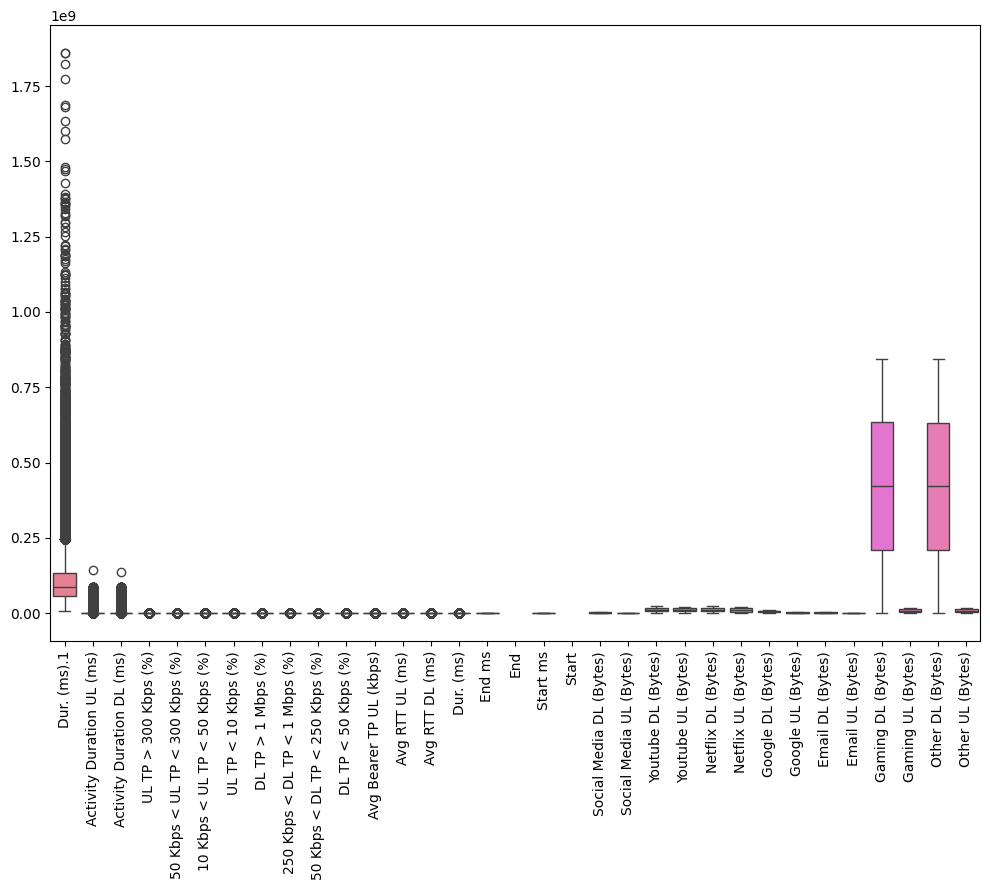

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()

In [19]:
# Remove rows with outliers
df_cleaned = df[~outliers.any(axis=1)]


In [20]:
detect_and_remove_outliers(df, numeric_columns)

Number of outliers removed: 18751


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,7.277826e+18,NaN,810.0,NaN,890.0,30534.0,2.082019e+14,3.367881e+10,3.555601e+13,D11929B,...,8798652.0,18286704.0,14153956.0,6879442.0,776889791.0,4810980.0,236415246.0,13985973.0,46907015.0,810343169.0
1,1.304243e+19,NaN,884.0,NaN,716.0,34826.0,2.082014e+14,3.362752e+10,3.546091e+13,L73670B,...,21029756.0,20478252.0,11742541.0,13151690.0,353309186.0,3349765.0,137193181.0,3859505.0,42678584.0,399825512.0
2,7.277826e+18,NaN,189.0,NaN,427.0,29217.0,2.082014e+14,3.360355e+10,8.662190e+13,T10316B,...,4403179.0,3820096.0,8256248.0,21885226.0,86407697.0,11264217.0,618078222.0,2988432.0,41707503.0,110718029.0
3,7.277826e+18,NaN,683.0,NaN,788.0,27422.0,2.082015e+14,3.365999e+10,3.530401e+13,D14192A,...,2155418.0,21489173.0,15157474.0,9370203.0,430297013.0,15654488.0,244013561.0,2998814.0,52058664.0,455286867.0
4,1.304243e+19,NaN,268.0,NaN,563.0,33215.0,2.082014e+14,3.367555e+10,3.544361e+13,T21340B,...,7701691.0,15228346.0,15328298.0,2084822.0,687131738.0,6335213.0,49700084.0,2930605.0,30484247.0,724007651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,1.304243e+19,NaN,82.0,NaN,160.0,27947.0,2.082003e+14,3.366567e+10,3.594691e+13,D42262B,...,7619935.0,10715971.0,14015278.0,18807861.0,133230879.0,3328741.0,26349024.0,2076395.0,38882995.0,156507755.0
149997,1.304243e+19,NaN,556.0,NaN,45.0,32227.0,2.082014e+14,3.366394e+10,3.594791e+13,D72977B,...,18675380.0,21462020.0,1205249.0,16234679.0,507254149.0,6285508.0,679250475.0,5083302.0,50285985.0,531312724.0
149998,7.349883e+18,NaN,648.0,NaN,277.0,23167.0,2.082014e+14,3.376373e+10,3.537971e+13,L18801C,...,22302577.0,14411263.0,17560857.0,11189021.0,312214650.0,13552488.0,667647114.0,6718377.0,47768404.0,359393275.0
149999,1.304243e+19,NaN,516.0,NaN,15.0,37698.0,2.082014e+14,3.369953e+10,3.540701e+13,D30447C,...,17476422.0,11733237.0,15548454.0,21065156.0,124417144.0,2924628.0,292631876.0,16150773.0,56669536.0,162593770.0


In [21]:
calculate_summary_statistics(df)

(Bearer Id                         1.014659e+19
 Start                                      NaN
 Start ms                          4.992189e+02
 End                                        NaN
 End ms                            4.986243e+02
 Dur. (ms)                         1.051294e+05
 IMSI                              2.082016e+14
 MSISDN/Number                     4.191542e+10
 IMEI                              4.849938e+13
 Last Location Name                1.961360e+16
 Avg RTT DL (ms)                   1.066723e+02
 Avg RTT UL (ms)                   1.763891e+01
 Avg Bearer TP DL (kbps)           1.329063e+04
 Avg Bearer TP UL (kbps)           1.771301e+03
 DL TP < 50 Kbps (%)               9.287039e+01
 50 Kbps < DL TP < 250 Kbps (%)    3.050960e+00
 250 Kbps < DL TP < 1 Mbps (%)     1.714057e+00
 DL TP > 1 Mbps (%)                1.610515e+00
 UL TP < 10 Kbps (%)               9.853329e+01
 10 Kbps < UL TP < 50 Kbps (%)     7.751555e-01
 50 Kbps < UL TP < 300 Kbps (%)    1.482

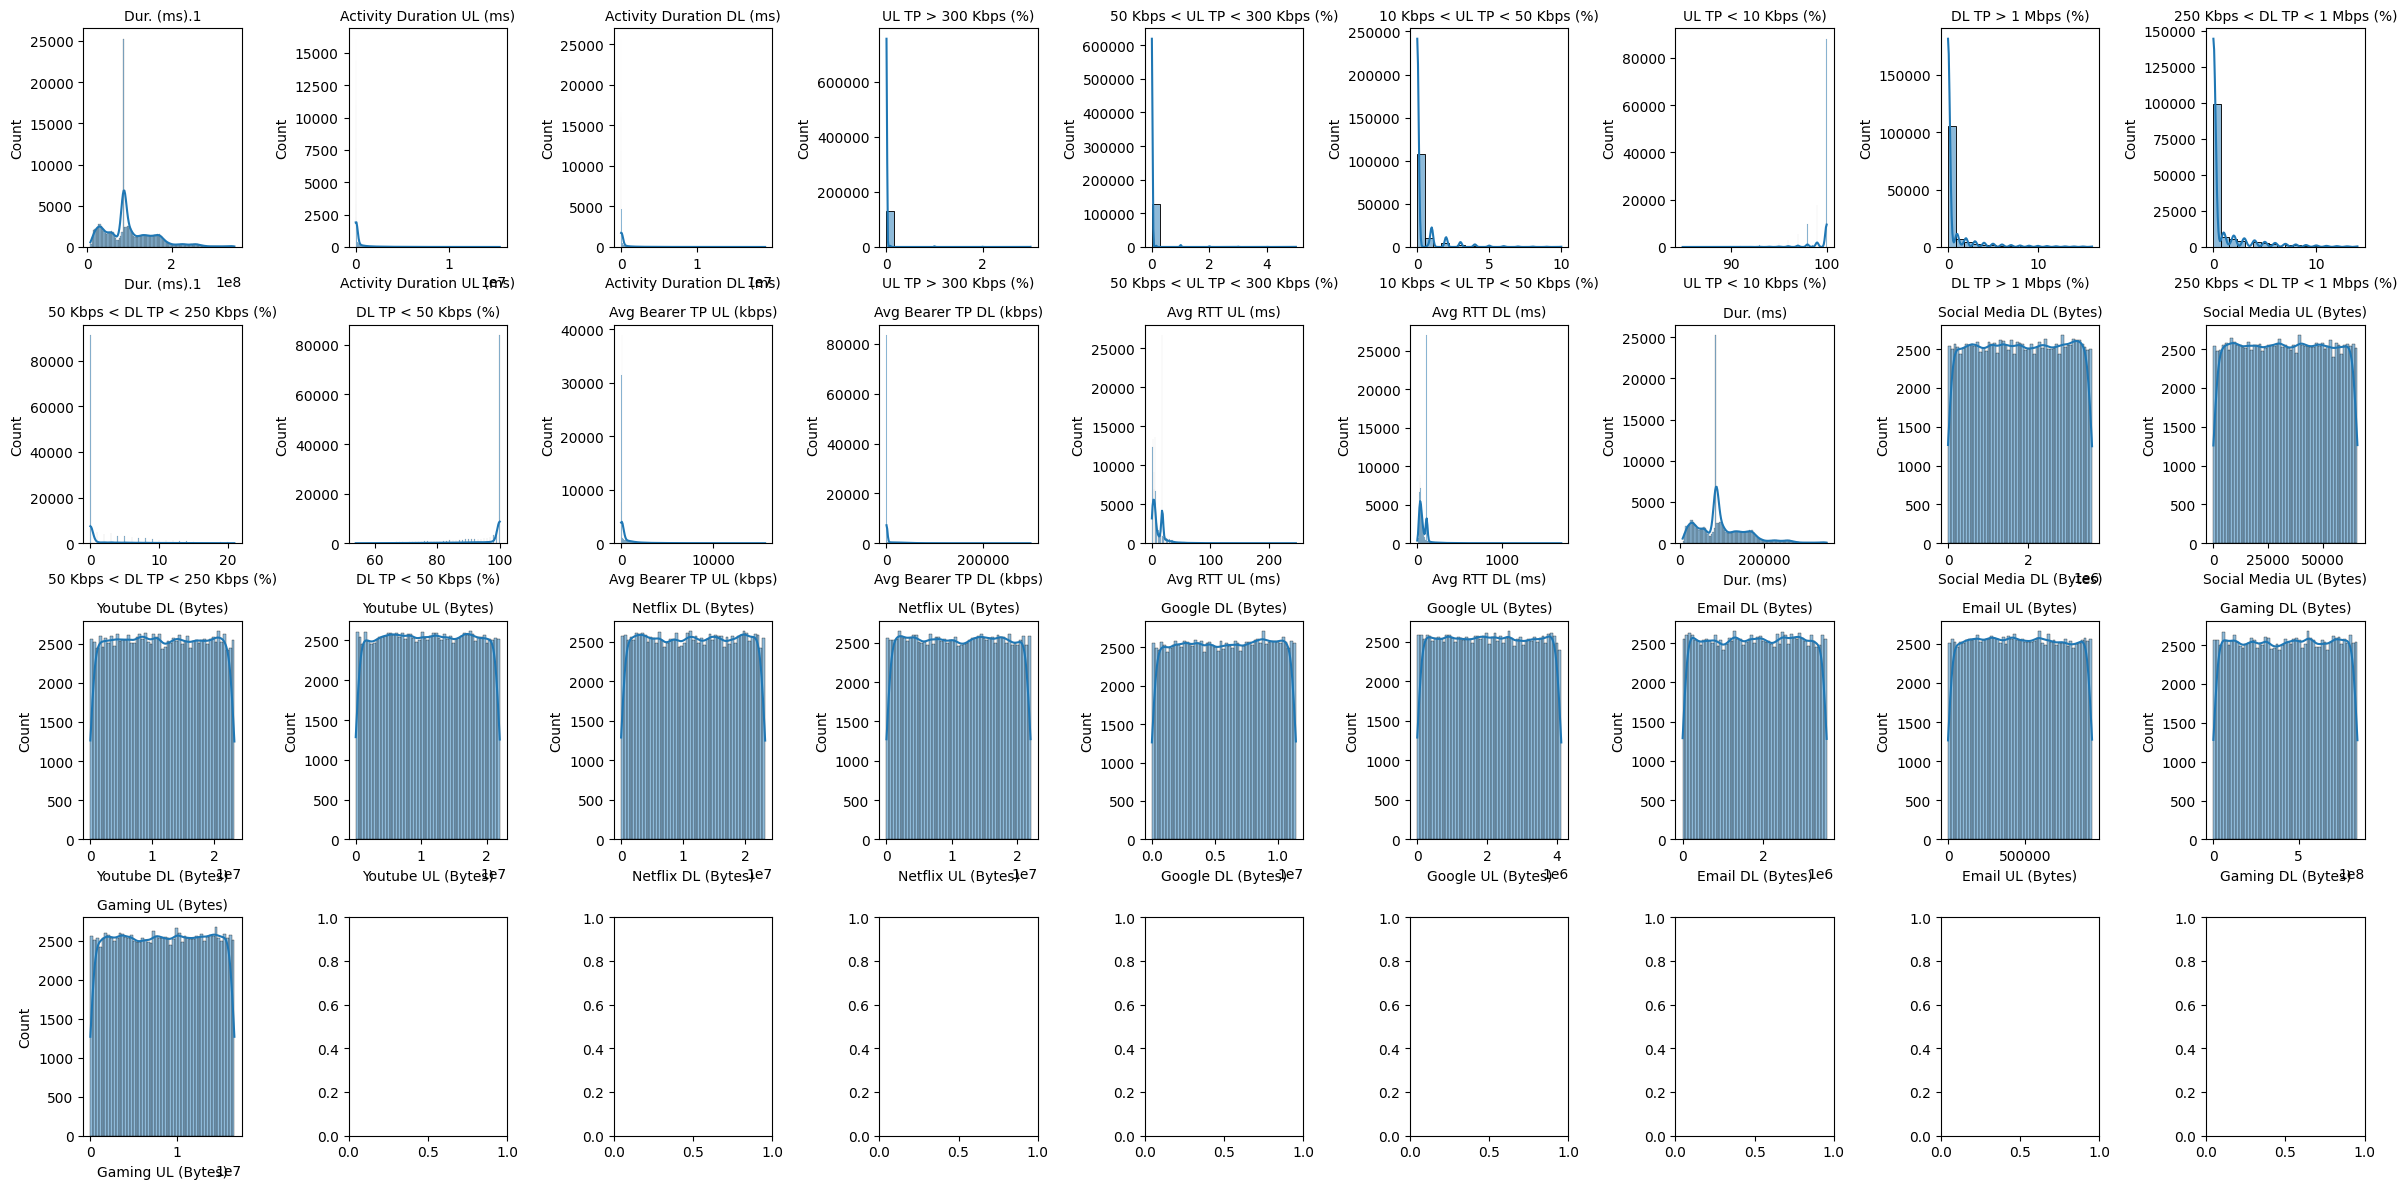

In [22]:
# List of variables to plot (must match number of subplots, 27 in this case)
variables = ['Dur. (ms).1', 'Activity Duration UL (ms)', 'Activity Duration DL (ms)', 
    'UL TP > 300 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 
    '10 Kbps < UL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)', 
    'DL TP > 1 Mbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
    '50 Kbps < DL TP < 250 Kbps (%)', 'DL TP < 50 Kbps (%)',
    'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)', 
    'Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'Dur. (ms)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

# Assuming you have a DataFrame named 'df_cleaned' and the list 'variables' defined
plot_variable_distributions(df_cleaned, variables)

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Overview_Analysis.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total DL + UL (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']


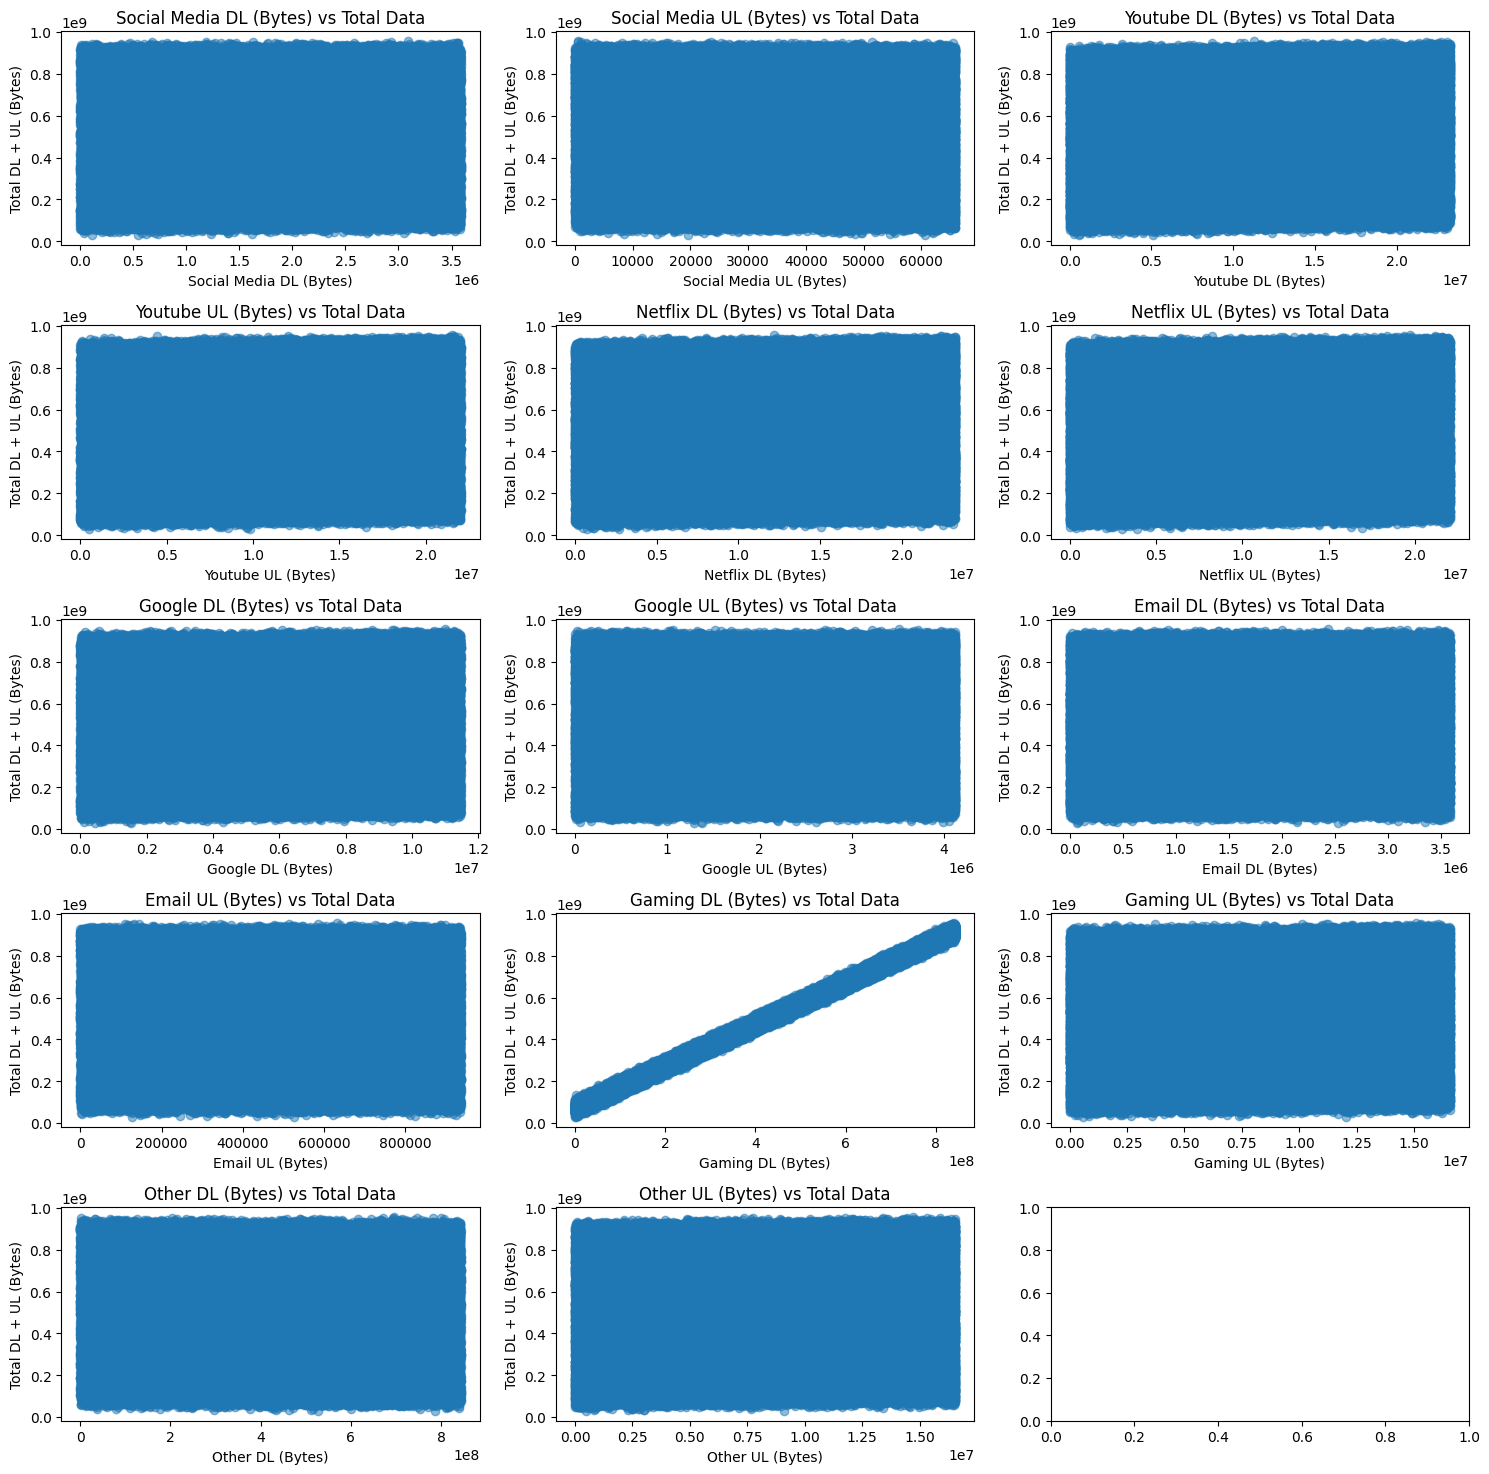

In [23]:
# List of applications to plot against total data (DL + UL)
applications = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)']

plot_application_usage(df_cleaned, applications)

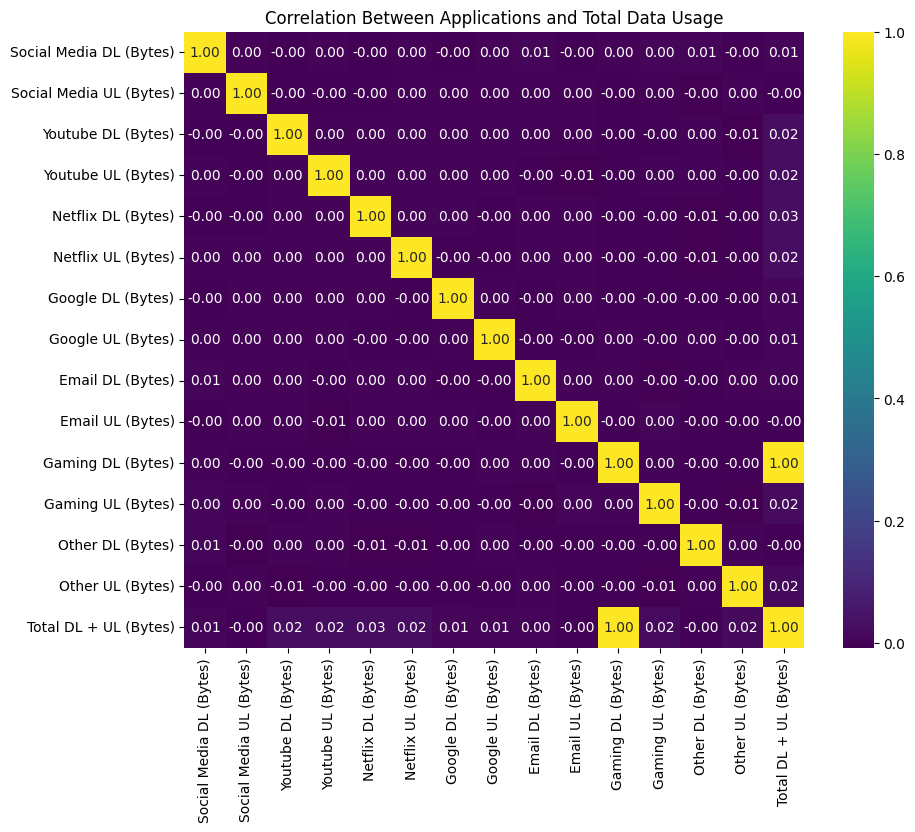

In [24]:
analyze_application_correlations(df_cleaned, applications)

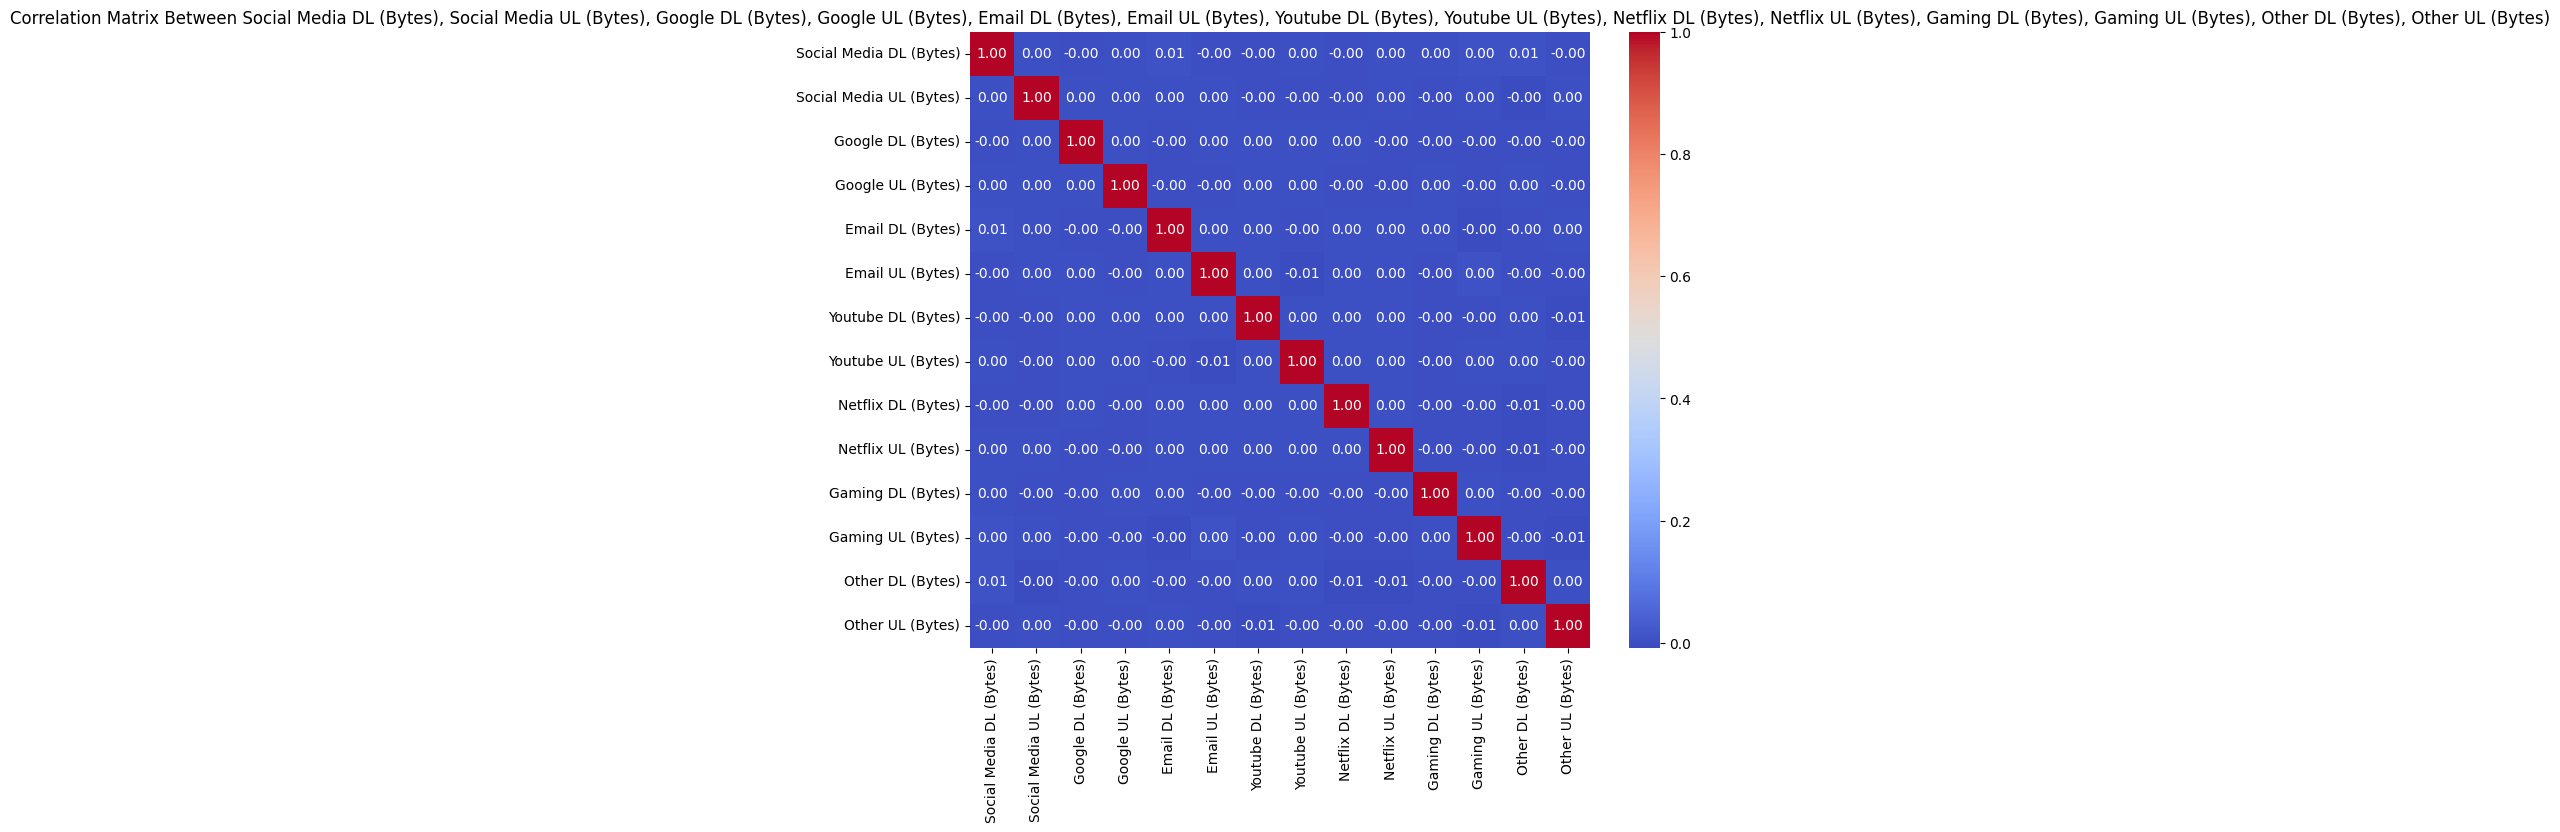

In [25]:
# Define the relevant columns for analysis
columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)']

analyze_correlation_matrix(df_cleaned, columns)


Explained Variance:
  - PC1: 0.07
  - PC2: 0.07


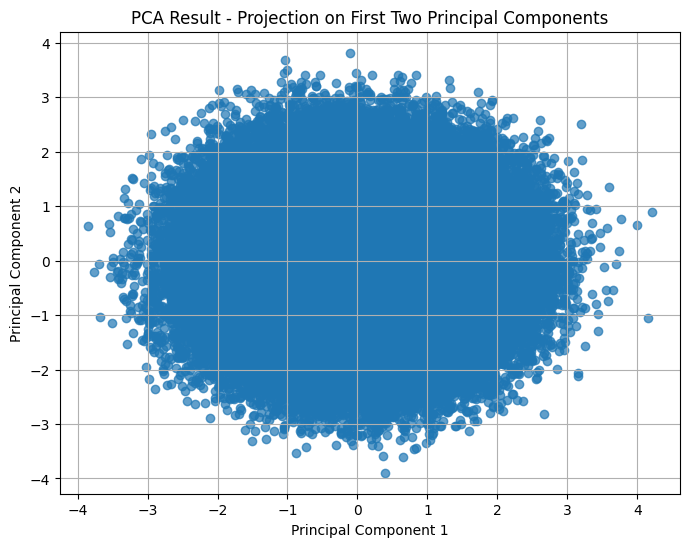

In [26]:
# Define the relevant columns for PCA
columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)']

perform_pca(df_cleaned, columns)

In [27]:
df.to_csv('C:/Users/ephre/Documents/Telecommunication-dataset-analysis/Dashboard/User_Overview.csv', index=False)
